In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CNN을 이용한 manhole 이미지 분류 모델
**# Flow:**
1. 데이터셋 준비
2. 경로 지정 및 데이터 살펴보기
3. 이미지 데이터 전처리
4. 모델 구성
5. 모델 학습
6. 테스트 평가
7. 모델 저장


**# Timeline:**
1. 23.08.03 시작. 합성곱 신경망까지 구성 완료
2. 23.08.08 데이터 크롤링 완료. 모델 학습 및 평가 완료

## #Main issue

~~마운트 30분마다 꺼짐 개빡침~~</br>
코랩 자꾸 스크롤 이상한대로 튀는거 개빡침</br>
~~파이썬 이용 크롤링. 로컬로 받아서 올릴지 아니면 colab으로 바로~~</br>
~~모델 저장 한 뒤에 어떤 식으로 배포 ?~~</br>
Flutter에 어떻게 적용 ? DB는 ?</br>
**본선까지 최대한 완성!**

https://medium.com/@sunminlee89/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C-%EB%9D%BC%EC%9D%B4%ED%8A%B8%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EC%95%88%EB%93%9C%EB%A1%9C%EC%9D%B4%EB%93%9C-%EB%94%A5%EB%9F%AC%EB%8B%9D-5%EC%9E%A5-f4c18716e437
flutter 모델적용 예제



In [36]:
# @title modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import PIL
import shutil
from google.colab import files

In [4]:
# @title dir 세팅
# 기본 dir
base_dir = '/content/drive/MyDrive/manhole/code/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# train O/X image dir
train_o_dir = os.path.join(train_dir, 'O')
train_x_dir = os.path.join(train_dir, 'X')
print(train_o_dir, train_x_dir)

# validation O/X image dir
validation_o_dir = os.path.join(validation_dir, 'O')
validation_x_dir = os.path.join(validation_dir, 'X')
print(validation_o_dir, validation_x_dir)

# test O/X image dir
test_o_dir = os.path.join(test_dir, 'O')
test_x_dir = os.path.join(test_dir, 'X')
print(test_o_dir, test_x_dir)

# train O/X image dir
train_o_fnames = os.listdir(train_o_dir)
train_x_fnames = os.listdir(train_x_dir)
print(train_o_fnames)
print(train_x_fnames)

# 각 dir별 이미지 개수 확인
print('Total training o images :', len(os.listdir(train_o_dir)))
print('Total training x images :', len(os.listdir(train_x_dir)))

print('Total validation o images :', len(os.listdir(validation_o_dir)))
print('Total validation x images :', len(os.listdir(validation_x_dir)))

print('Total test o images :', len(os.listdir(test_o_dir)))
print('Total test x images :', len(os.listdir(test_x_dir)))

/content/drive/MyDrive/manhole/code/images/train/O /content/drive/MyDrive/manhole/code/images/train/X
/content/drive/MyDrive/manhole/code/images/validation/O /content/drive/MyDrive/manhole/code/images/validation/X
/content/drive/MyDrive/manhole/code/images/test/O /content/drive/MyDrive/manhole/code/images/test/X
['6RLH6CCDLAUC.jpg', '930YYB7GT7DG.jpg', 'YVJ6GX53E1G9.jpg', 'UJBYNZKH7OP0.jpg', 'HHOWR0TTDB79.jpg', 'OZ7CS0ZBOMO4.jpg', '7LM0PA1OMCOM.jpg', 'NQY03J6CXL8M.jpg', 'ODYZ5NXFVU2O.jpg', 'VFNLJCYGSYVN.jpg', 'CMIHV12BC56E.jpg', '23ORGLANMAKF.jpg', '1S2FZLJL5YPG.jpg', 'A37A9HWK30Y4.jpg', 'VKX6T6FPKS99.jpg', '50JTOROQIK97.jpg', 'LTQ4U9JW471X.jpg', 'DFY0F2GCD8B5.jpg', '7F3GZWI8DEIR.jpg', '3HP5MI5YXCD8.jpg', 'CHRIVQQP36UH.jpg', '2059YJLLMCP8.jpg', 'EV65Z4XE3Z7G.jpg', '6R6GQ08LQ32M.jpg', 'HDN3QZ3GI7ZV.jpg', 'AGG2DT6M2GNQ.jpg', '4C9N1Z6EMY99.jpg', 'XA5VQ0YPUPJM.jpg', 'JS802AC43PWO.jpg', 'YNFZKUCBO5MG.jpg', '2G8WODIKNYET.jpg', 'OV90HBFLKEQU.jpg', 'S7D93LJJNKM8.jpg', 'MZ4ICBW8Q3MF.jpg', 'A8ZG

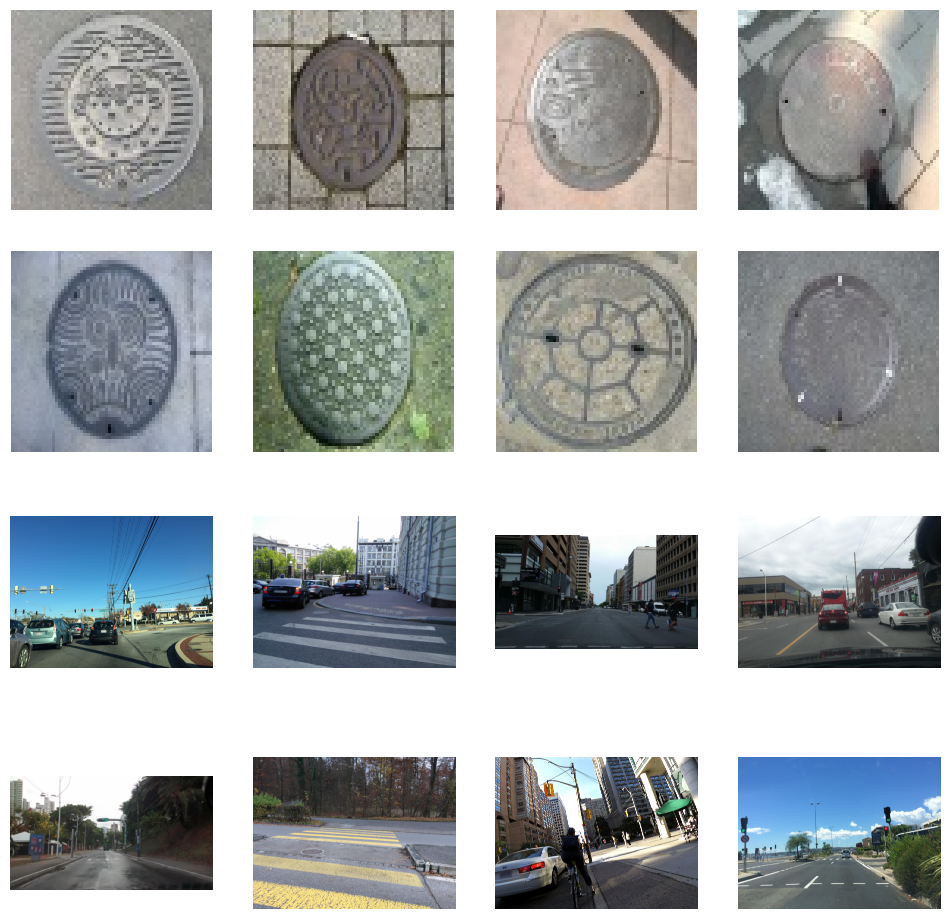

In [5]:
# @title img check
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_o_pix = [os.path.join(train_o_dir, fname) for fname in train_o_fnames[pic_index-8:pic_index]]
next_x_pix = [os.path.join(train_x_dir, fname) for fname in train_x_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_o_pix+next_x_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [6]:
# @title 이미지 데이터 전처리 (keras of TF)
#from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array, array_to_img

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255, # 모든 이미지 원소값들을 255로 나누기
                                   rotation_range=25, # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   height_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2, # (1-0.2)~(1+0.2) => 0.8~1.2 사이에서 임의의 수치만큼 확대/축소
                                   horizontal_flip=True, # 좌우로 뒤집기
                                   vertical_flip=True,
                                   fill_mode='nearest'
                                  )
# validation 및 test 이미지는 augmentation을 적용하지 않는다
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만들기
# 변환된 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16, # 한번에 변환된 이미지 개수
                                                    class_mode='binary',
                                                    target_size=(150,150)) # target_size에 맞춰서 이미지의 크기가 조절된다
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=16,
                                                              class_mode='binary',
                                                              target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))
# 참고로, generator 생성시 batch_size x steps_per_epoch (model fit에서) <= 훈련 샘플 수 보다 작거나 같아야 함

Found 1660 images belonging to 2 classes.
Found 321 images belonging to 2 classes.
Found 859 images belonging to 2 classes.


In [7]:
# @title Label check
# class 확인
train_generator.class_indices

{'O': 0, 'X': 1}

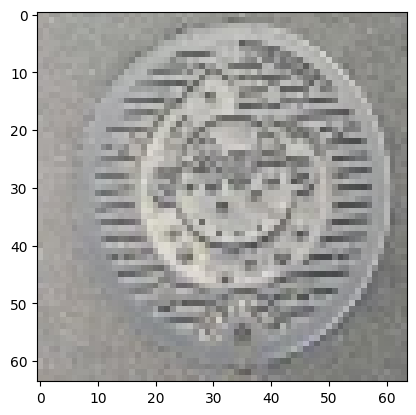

In [8]:
# 이미지 하나 불러오기(Augmentation 적용 체크)
sample_img = mpimg.imread(next_o_pix[0])
plt.imshow(sample_img)
plt.show()

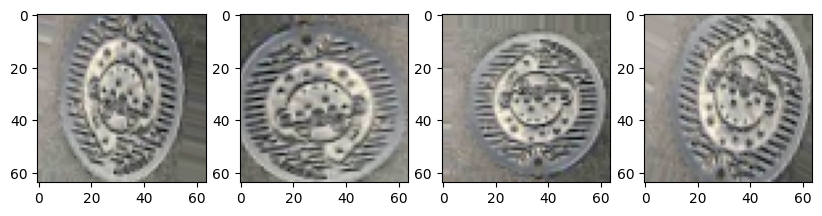

In [9]:
max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]
# 축을 하나 추가했는데, 하나의 이미지만 바꿔주는게 아니라 동시에 여러개의 이미지를 바꿔줄 수 있기에,
# 그림 개수/장수 까지 받아서 4차원으로 (개수/장수, h, w, channel) 이렇게 받는다
# 쉽게 말해, 받는 형식이 4차원이라서 4차원 형태로 만들어 준것

plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

In [10]:
# @title 모델 구성 (합성곱 신경망)
# 합성곱 신경망 모델 구성하기
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), #color -> rgb(3), grayscale -> bw(2)
    # (3 * 3)(filter size) *  3(input filter(RGB=3)) * 16(output filter) + 16<bias>
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    # 3 * 3 * 16 * 32 + 32<bias>
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # 3 * 3 * 32 * 64 + 64<bias>
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # 18496 * 512
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망의 구조 확인

# 출력층의 활성화함수로 sigmoid 사용 -> Classification이기 때문에!

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [11]:
# @title 모델 학습
from tensorflow.keras.optimizers import RMSprop

# compile() 메서드를 이용해서 손실 함수 (loss function)와 옵티마이저 (optimizer)를 지정
model.compile(optimizer=RMSprop(learning_rate=0.001), # 옵티마이저로는 RMSprop 사용
              loss='binary_crossentropy', # binary_crossentropy or mean_squared_error
              metrics= ['accuracy'])
# RMSprop (Root Mean Square Propagation) Algorithm: 훈련 과정 중에 학습률을 적절하게 변화시킨다.

# 모델 학습
history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다
                              validation_data=validation_generator, # validation_generator안에도 검증용 X,y데이터들이 다 있으니 generator로 주면 됨
                              steps_per_epoch=10, # 한 번의 에포크(epoch)에서 훈련에 사용할 배치(batch)의 개수 지정; generator를 4번 부르겠다
                              epochs=100, # 100이상
                              validation_steps=5, # 한 번의 에포크가 끝날 때, 검증에 사용되는 배치(batch)의 개수를 지정; validation_generator를 4번 불러서 나온 이미지들로 작업을 해라
                              verbose=2)
# 참고: validation_steps는 보통 내가 원하는 이미지 수에 flow할 때 지정한 batchsize로 나눈 값을 validation_steps로 지정

<ipython-input-11-665e5abafdba>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, # train_generator안에 X값, y값 다 있으니 generator만 주면 된다


Epoch 1/100
10/10 - 48s - loss: 1.6056 - accuracy: 0.5938 - val_loss: 0.5086 - val_accuracy: 0.9375 - 48s/epoch - 5s/step
Epoch 2/100
10/10 - 34s - loss: 0.6545 - accuracy: 0.7188 - val_loss: 0.3435 - val_accuracy: 0.9000 - 34s/epoch - 3s/step
Epoch 3/100
10/10 - 25s - loss: 0.4003 - accuracy: 0.8125 - val_loss: 0.1907 - val_accuracy: 0.9500 - 25s/epoch - 3s/step
Epoch 4/100
10/10 - 23s - loss: 0.5361 - accuracy: 0.7437 - val_loss: 0.2325 - val_accuracy: 0.9500 - 23s/epoch - 2s/step
Epoch 5/100
10/10 - 23s - loss: 0.3103 - accuracy: 0.8938 - val_loss: 0.1065 - val_accuracy: 0.9625 - 23s/epoch - 2s/step
Epoch 6/100
10/10 - 20s - loss: 0.4951 - accuracy: 0.8062 - val_loss: 0.1699 - val_accuracy: 0.9750 - 20s/epoch - 2s/step
Epoch 7/100
10/10 - 31s - loss: 0.2526 - accuracy: 0.9187 - val_loss: 0.2146 - val_accuracy: 0.9250 - 31s/epoch - 3s/step
Epoch 8/100
10/10 - 21s - loss: 0.2761 - accuracy: 0.9250 - val_loss: 0.0828 - val_accuracy: 0.9625 - 21s/epoch - 2s/step
Epoch 9/100
10/10 - 20s 

In [12]:
# @title 모델 성능 평가
model.evaluate(train_generator)
model.evaluate(validation_generator)

21/21 [==============================] - 15s 716ms/step - loss: 0.0497 - accuracy: 0.9844


[0.04967113584280014, 0.9844236969947815]

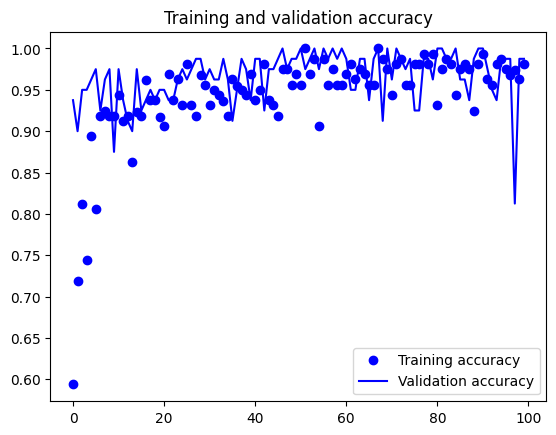

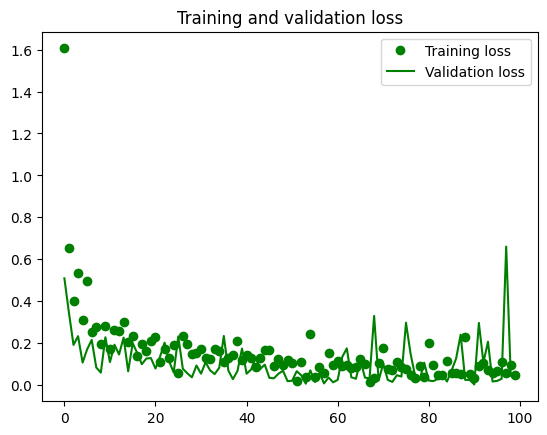

In [13]:
# @title 모델 정확도 및 loss 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 138ms/step


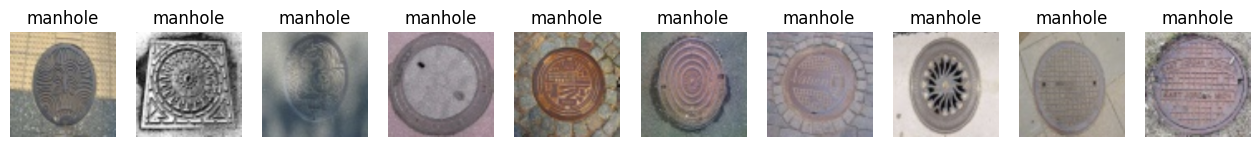

1/1 [==============================] - 0s 39ms/step


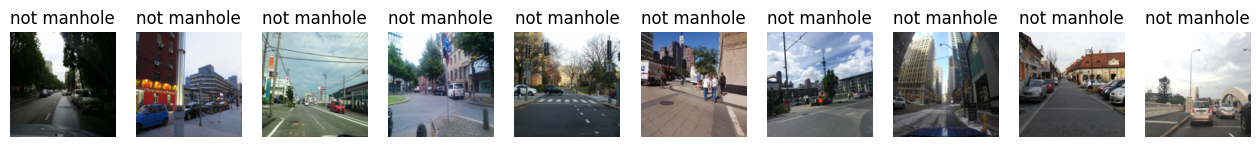

In [14]:
# @title 테스트 평가
import numpy as np
from keras.preprocessing import image

# 테스트용 O 이미지 경로 설정
test_dir = '/content/drive/MyDrive/manhole/code/images/test/'
test_o_dir = os.path.join(test_dir, 'O')
test_o_filenames = os.listdir(test_o_dir)
test_o_filenames

# 테스트용 X 이미지 경로 설정
test_dir = '/content/drive/MyDrive/manhole/code/images/test/'
test_x_dir = os.path.join(test_dir, 'X')
test_x_filenames = os.listdir(test_x_dir)
test_x_filenames

# O,X를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_ox_filenames = {}
dic_ox_filenames['O'] = test_o_filenames
dic_ox_filenames['X'] = test_x_filenames

# O/X 분류 테스트
for ox, filenames in dic_ox_filenames.items():
    fig = plt.figure(figsize=(16,10))
    n = 10
    rows, cols = 1, n
    cnt = 0
    for i, fn in enumerate(filenames):
        cnt += 1
        if cnt == n + 1:
          break
        path = test_dir + ox + '/' + fn
        test_img = load_img(path, target_size=(150, 150), interpolation='bilinear')
        x = img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)

        fig.add_subplot(rows, cols, i+1)
        if classes[0]==0:
            plt.title("manhole")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
        else:
            plt.title("not manhole")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
    plt.show();

1/1 [==============================] - 0s 51ms/step


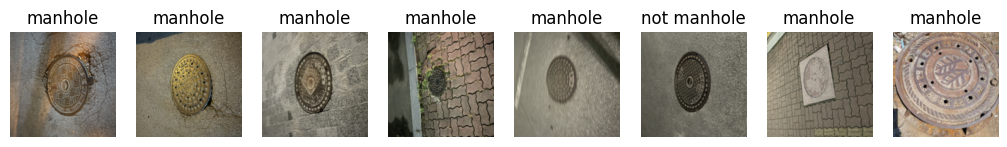

1/1 [==============================] - 0s 46ms/step


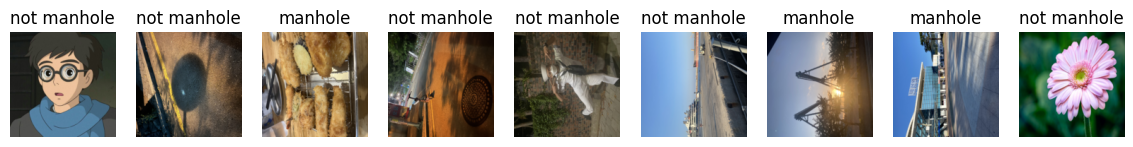

In [31]:
# @title 직접찍은 사진 테스트
# 테스트용 O 이미지 경로 설정
test_dir = '/content/drive/MyDrive/manhole/code/images/test_single/'
test_o_dir = os.path.join(test_dir, 'O')
test_o_filenames = os.listdir(test_o_dir)
test_o_filenames

# 테스트용 X 이미지 경로 설정
test_dir = '/content/drive/MyDrive/manhole/code/images/test_single/'
test_x_dir = os.path.join(test_dir, 'X')
test_x_filenames = os.listdir(test_x_dir)
test_x_filenames

# O,X를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_ox_filenames = {}
dic_ox_filenames['O'] = test_o_filenames
dic_ox_filenames['X'] = test_x_filenames

# O/X 분류 테스트
for ox, filenames in dic_ox_filenames.items():
    fig = plt.figure(figsize=(16,10))
    n = 10
    rows, cols = 1, n
    cnt = 0
    for i, fn in enumerate(filenames):
        cnt += 1
        if cnt == n + 1:
          break
        path = test_dir + ox + '/' + fn
        test_img = load_img(path, target_size=(150, 150), interpolation='bilinear')
        x = img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)

        fig.add_subplot(rows, cols, i+1)
        if classes[0]==0:
            plt.title("manhole")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
        else:
            plt.title("not manhole")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
    plt.show();

In [27]:
# 모델 성능 평가
model.evaluate(test_generator)

43/43 [==============================] - 38s 855ms/step - loss: 0.0419 - accuracy: 0.9849


[0.04190441220998764, 0.9848661422729492]

In [33]:
# @title 모델 저장
model.save('dl_cnn_manhole.h5')

In [38]:
# Load the Keras model from the H5 file
keras_model = tf.keras.models.load_model('/content/drive/MyDrive/manhole/code/dl_cnn_manhole.h5')

# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)